#text generation

In [2]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [23]:
#text pre processing
text='hello, iam govardhan and iam from computer science and engineering department and iam learning natural language processing'
new_text=[]
for i in text:
    new_text.append(i)
x=[]
y=[]
prev=4
for i in range(len(new_text)-prev):
    x.append(new_text[i:i+prev])
    y.append(new_text[i+prev])

    

In [25]:
uni=set(text)
uni=list(uni)
d={}
for i in range(len(uni)):
    d[uni[i]]=i

In [27]:
for i in  range(len(x)):
    
    
    for j in range(len(x[i])):
        x[i][j]=d[x[i][j]]
for i in range(len(y)):
    y[i]=d[y[i]]


In [35]:
x=np.array(x)
y=np.array(y)

y=y.reshape(-1,1)
x_train,x_test=x[:int(len(x)*0.8)],x[int(len(x)*0.2):]
y_train,y_test=y[:int(len(x)*0.8)],y[int(len(x)*0.2):]

In [39]:
model=Sequential([
    
    layers.SimpleRNN(5,activation='tanh',input_shape=(prev,1)),
    layers.Dense(units=1)
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 5)                   │              35 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 41 (164.00 B)

 Trainable params: 41 (164.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
model.compile(loss='mse',optimizer='adam')


In [41]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [44]:
model.fit(x_train,y_train,batch_size=3,epochs=50)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 52.0714
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 67.3618
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.2344
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.6826
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 48.7424
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 46.2304
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.5462
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 41.4373
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.2164
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 35.4959
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.4873
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 43.1722
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.5455
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.4973
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 36.2636
Epoc

In [59]:
pred=model.predict(x_test[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [80]:
x_test[0].shape

(4, 1)

In [81]:
model.predict(x_test[0].reshape(1,4,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


array([[8.111437]], dtype=float32)

In [85]:
def generate_text(model,seed,d,lookback,length=10):
    text_generated=' '
    seed=list(seed)
    for i in range(len(seed)):
        seed[i]=d[seed[i]]
    
    
    
    for i in range(length):
        test=[seed[-lookback:]]
        
        test=np.array(test)
        
        
        test=test.reshape(1,4,1)
        
        p=model.predict(test)
        seed.append(int(p))
    for i in seed:
        for k,v in d.items():
            if v==i:
                text_generated=text_generated+k
    return text_generated,seed

        
    
        

generate_text(model,'govard',d,4)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step

C:\Users\Admin\AppData\Local\Temp\ipykernel_5592\3079949749.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  seed.append(int(p))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


(' govardlmlmrrrrrr', [16, 0, 12, 5, 7, 14, 6, 8, 6, 8, 7, 7, 7, 7, 7, 7])

WORKING ON AIRLINE DATA

In [71]:
#air line data
#want to predict the no of passanges that will travel in next 12 months using the previous years/months data

#loading data
import pandas as pd 
import numpy as np
data=pd.read_csv('airline.csv')

In [72]:
data=data.iloc[1:,1]
data=np.array(data).reshape(-1,1)


In [75]:
x=[]
y=[]
for i in range(len(data)-prev):
    x.append(data[i:i+prev])
    y.append(data[i+prev])

y=np.array(y).reshape(-1,1)

In [73]:
#scaling the data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data=scaler.fit_transform(data)
#y=scaler.transform(y)

In [76]:
#splitting data into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [82]:
x_train=np.array(x_train).reshape(len(x_train),len(x_train[0]),1)
x_test=np.array(x_test).reshape(len(x_test),len(x_test[0]),1)

In [87]:
#after readying our data we are going to build our model
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#architecure
'''an rnn layeer consisting 4 units
   1 dense layer with 1 unit
   activation function is tanh at rnn layer'''
model=Sequential()
model.add(layers.SimpleRNN(4,input_shape=(prev,1)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=10,batch_size=1)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2089
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0412   
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0295  
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0194   
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0102   
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0128
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0092
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0120   
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0126
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0141


In [88]:
test_pred=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


In [90]:
test_pred=scaler.inverse_transform(test_pred)

In [100]:
y_test=scaler.inverse_transform(y_test)

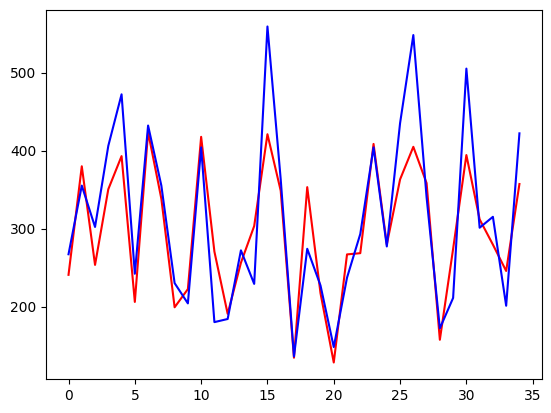

In [103]:
#plotting both actual and predicted to see the difference
import matplotlib.pyplot as plt
plt.plot(test_pred,color='red')
plt.plot(y_test,color='blue')

weather forecasting using rnn

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
data=pd.read_csv('daily-minimum-temperatures-in-me.csv')

data['Daily minimum temperatures in Melbourne, Australia, 1981-1990'] = pd.to_numeric(data['Daily minimum temperatures in Melbourne, Australia, 1981-1990'], errors='coerce')
data.dropna(subset=['Daily minimum temperatures in Melbourne, Australia, 1981-1990'], inplace=True)


data=np.array(data.iloc[:,1])

#scaling the data

scaler=MinMaxScaler()
data=data.reshape(-1,1)
data=scaler.fit_transform(data)

lookback=7
x=[]
y=[]

for i in range(len(data)-lookback):
    x.append(data[i:i+lookback])
    y.append(data[i+lookback])
x=np.array(x)
y=np.array(y)

x_train,x_test=x[:int(len(x)*0.8)],x[int(len(x)*0.2):]
y_train,y_test=y[:int(len(y)*0.8)],y[int(len(y)*0.2):]

#model

model=Sequential([
    layers.SimpleRNN(40,input_shape=(lookback,1)),
    layers.Dense(1)
])
model.summary()

#reshaping

x_train=np.array(x_train).reshape(x_train.shape[0],x_train.shape[1],1)
x_test=np.array(x_test).reshape(x_test.shape[0],x_test.shape[1],1)
model.compile(loss='mse',optimizer=Adam(learning_rate=0.001))
model.fit(x_train,y_train,batch_size=1,epochs=10)



C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 40)                  │           1,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              41 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,721 (6.72 KB)

 Trainable params: 1,721 (6.72 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 0.0126
Epoch 2/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0103
Epoch 3/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0099
Epoch 4/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0099
Epoch 5/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0095
Epoch 6/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0092
Epoch 7/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0092
Epoch 8/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0093
Epoch 9/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0099
Epoch 10/10
2912/2912 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - loss: 0.0101


In [6]:
pred=model.predict(x_test)

91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [8]:
pred=scaler.inverse_transform(pred)
y_test=scaler.inverse_transform(y_test)

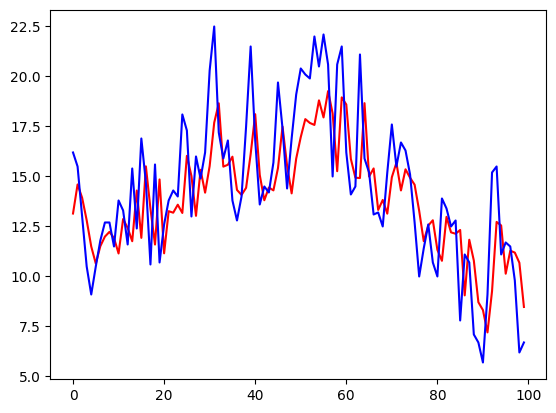

In [112]:
import matplotlib.pyplot as plt
plt.plot(pred[:100],color='red')
plt.plot(y_test[:100],color='blue')

In [12]:
from sklearn.metrics import mean_squared_error,r2_score
rmse=np.sqrt(mean_squared_error(pred,y_test))
r2=r2_score(pred,y_test)
print('rmse:',rmse)
print('r2_score:',r2)

rmse: 2.422302193692806
r2_score: 0.4517789407056607


array([[16.2],
       [15.5],
       [13. ],
       ...,
       [13.5],
       [15.7],
       [13. ]])